In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
# Samples are available in the file diabetes.csv

df = pd.read_csv('diabetes.csv', sep ='\t')

Para eliminar cualquier posible correlación entre las muestras (las filas del DataFrame), se reordenan aleatoriamente.

In [4]:
np.random.seed(1)

df = df.sample(frac=1)

Las muestras originales se dividen en 2 conjuntos: 90% para el aprendizaje y 10% para hacer inferencias (predicciones) después del aprendizaje.

In [5]:
test_ratio = 0.1

learn_ratio = int((1.0-test_ratio)*len(df.values[:,:]))

df_learn = df.iloc[0:learn_ratio,:]
df_test  = df.iloc[learn_ratio:,:]

In [6]:
print(df_learn.shape)
print(df_test.shape)

(397, 11)
(45, 11)


In [7]:
# normnalizamos los datos
mu = df_learn.mean()
sigma = df_learn.std()
df_learn_norm = (df_learn - mu)/ sigma
df_learn_norm.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
246,0.880549,-0.923573,-0.678927,-1.292722,1.678453,1.072260,1.179208,-0.202277,0.963141,-1.241175,-0.960557
425,-1.627292,-0.923573,-0.858406,-1.702184,-2.097449,-2.351121,0.482966,-1.597924,-0.422665,-1.065445,0.009443
293,-1.475302,-0.923573,1.923531,0.271467,0.439035,0.895527,0.018804,0.014824,-1.148812,-0.011066,0.638633
31,-0.487365,-0.923573,-1.374411,-1.702184,-0.800383,-1.113991,1.256568,-1.597924,-0.779650,-0.889715,-1.209611
359,0.804554,1.080025,0.106298,0.680929,0.150798,0.371874,-0.522717,0.728154,0.321844,1.306908,2.093633


In [8]:
df_test_norm = (df_test - mu) / sigma
df_test_norm.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
410,-0.183384,1.080025,-0.589187,0.175420,1.015508,0.784251,-0.600078,0.728154,1.408068,-0.889715,0.756606
216,0.272587,1.080025,0.734477,1.042007,1.130803,1.556639,-1.451040,3.054233,0.974545,1.043313,1.267822
264,0.728558,1.080025,0.577432,-0.691166,-0.944502,-0.197598,-1.064239,-0.047205,-1.253375,-0.450391,-0.082314
209,0.804554,1.080025,-0.387272,1.403084,-1.059796,-0.341603,-1.605760,0.728154,-0.244655,-0.274661,-0.973665
316,0.348582,1.080025,0.285778,0.030989,0.035503,-0.439788,-0.677438,0.728154,1.597094,0.867583,0.900795


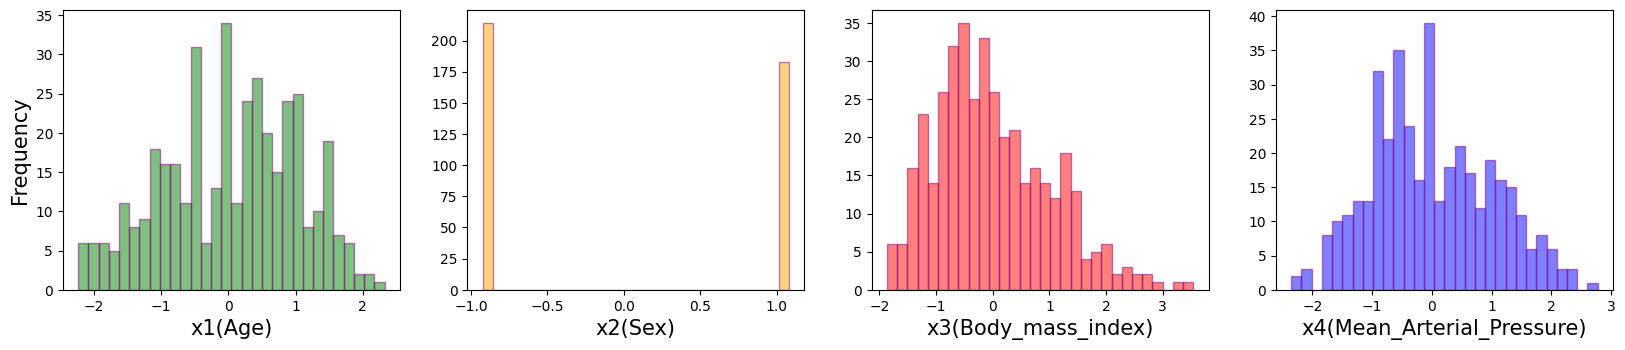

In [9]:
plt.figure(figsize=(20,8))

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df_learn_norm.AGE, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x1(Age)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_learn_norm.SEX, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x2(Sex)', size=15)

ax3.hist(df_learn_norm.BMI, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('x3(Body_mass_index)', size=15)

ax4.hist(df_learn_norm.BP, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('x4(Mean_Arterial_Pressure)', size=15);

In [10]:
learn_x = df_learn_norm.values[:,:-1]
learn_y = df_learn_norm.values[:,-1:]

In [11]:
test_x = df_test_norm.values[:,:-1]
test_y = df_test_norm.values[:,-1:]

In [12]:
print(learn_x.shape)
print(learn_y.shape)
print(test_x.shape)
print(test_y.shape)

(397, 10)
(397, 1)
(45, 10)
(45, 1)


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers
from tensorflow.keras import optimizers

np.random.seed(1)

In [14]:
keras.__version__


'3.8.0'

In [15]:
import networkx as nx

class Network(object):

    def  __init__ (self,sizes):
        self.num_layers = len(sizes)
        print("It has", self.num_layers, "layers,")
        self.sizes = sizes
        print("with the following number of nodes per layer",self.sizes)
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, x_of_sample):
        """Return the output of the network F(x_of_sample) """
        for b, w in zip(self.biases, self.weights):
            x_of_sample = sigmoid(np.dot(w, x_of_sample)+b)
        return x_of_sample

    def graph(self,sizes):
        a=[]
        ps={}
        Q = nx.Graph()
        for i in range(len(sizes)):
            Qi=nx.Graph()
            n=sizes[i]
            nodos=np.arange(n)
            Qi.add_nodes_from(nodos)
            l_i=Qi.nodes
            Q = nx.union(Q, Qi, rename = (None, 'Q%i-'%i))
            if len(l_i)==1:
                ps['Q%i-0'%i]=[i/(len(sizes)), 1/2]
            else:
                for j in range(len(l_i)+1):
                    ps['Q%i-%i'%(i,j)]=[i/(len(sizes)),(1/(len(l_i)*len(l_i)))+(j/(len(l_i)))]
            a.insert(i,Qi)
        for i in range(len(a)-1):
            for j in range(len(a[i])):
                for k in range(len(a[i+1])):
                    Q.add_edge('Q%i-%i' %(i,j),'Q%i-%i' %(i+1,k))
        nx.draw(Q, pos = ps)


It has 2 layers,
with the following number of nodes per layer [10, 1]


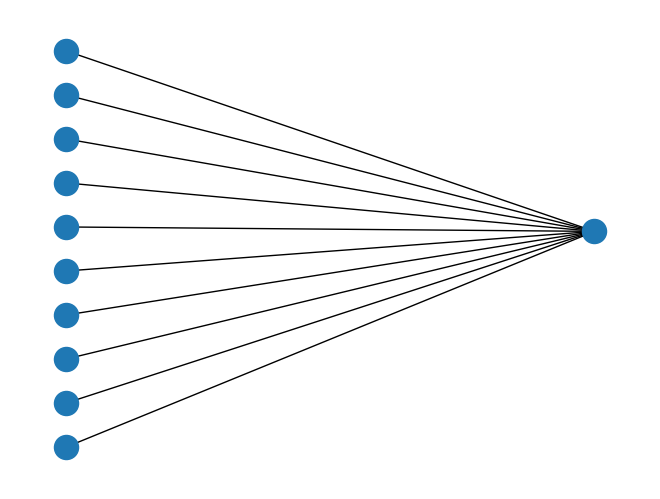

In [16]:
n_x = learn_x.shape[1]
n_y = learn_y.shape[1]

layers = [n_x, n_y]
net = Network(layers)
net.graph(layers)

In [17]:
np.random.seed(1)

input_nodes = n_x     # The input layer has n_x nodes. In the present case 10
output_nodes = n_y    # The output layer has n_y nodes. In the present case, only one

model = Sequential()

# For the first layer, you need to indicate its input layer, which corresponds to
# the input layer of the network.

model.add(Dense(output_nodes,  kernel_initializer='uniform', bias_initializer='zeros',
                input_dim=input_nodes))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


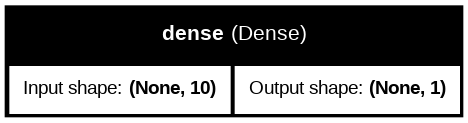

In [18]:
plot_model(model, to_file='model.png', show_shapes=True, rankdir='TB',
      expand_nested=True, show_layer_names=True, dpi=96)

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
# We define the optimizing function and their hyperparameters: learning rate,
# momentum and nesterov (whether to apply Nesterov gradient)

sgd = optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)

model.compile(loss='mean_squared_error', optimizer=sgd) # loss is the metric, in the present cas mean square error


In [21]:
# 10 % of the learning samples will be used to validate the learning: validation_ratio
validation_ratio = 0.1
epochs = 600

history = model.fit(learn_x, learn_y, epochs=epochs, validation_split = validation_ratio, verbose=1)

# the "history" object contains the information generated during the learning

Epoch 1/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.8711 - val_loss: 0.6234
Epoch 2/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5742 - val_loss: 0.5572
Epoch 3/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5519 - val_loss: 0.5197
Epoch 4/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5735 - val_loss: 0.4897
Epoch 5/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5697 - val_loss: 0.4775
Epoch 6/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5333 - val_loss: 0.4768
Epoch 7/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5120 - val_loss: 0.4623
Epoch 8/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5426 - val_loss: 0.4583
Epoch 9/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5153 - val_loss: 0.4545
Epoch 10/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5194 - val_loss: 0.4538
Epoch 11/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5506 - val_loss: 0.4564
Epoch 12/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

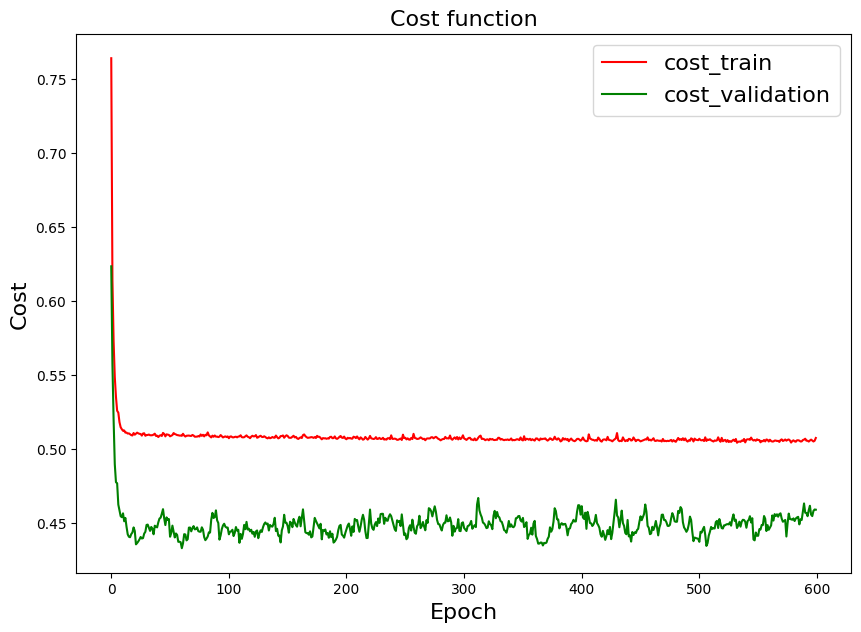

In [22]:
plt.figure(figsize=(10, 7))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Cost function', size=16)
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['cost_train', 'cost_validation'], loc='upper right', prop={'size': 16})
plt.show()

In [23]:
preds = model.evaluate(x=test_x, y=test_y)

print ("Loss = " + str(preds))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.4883
Loss = 0.4822159707546234


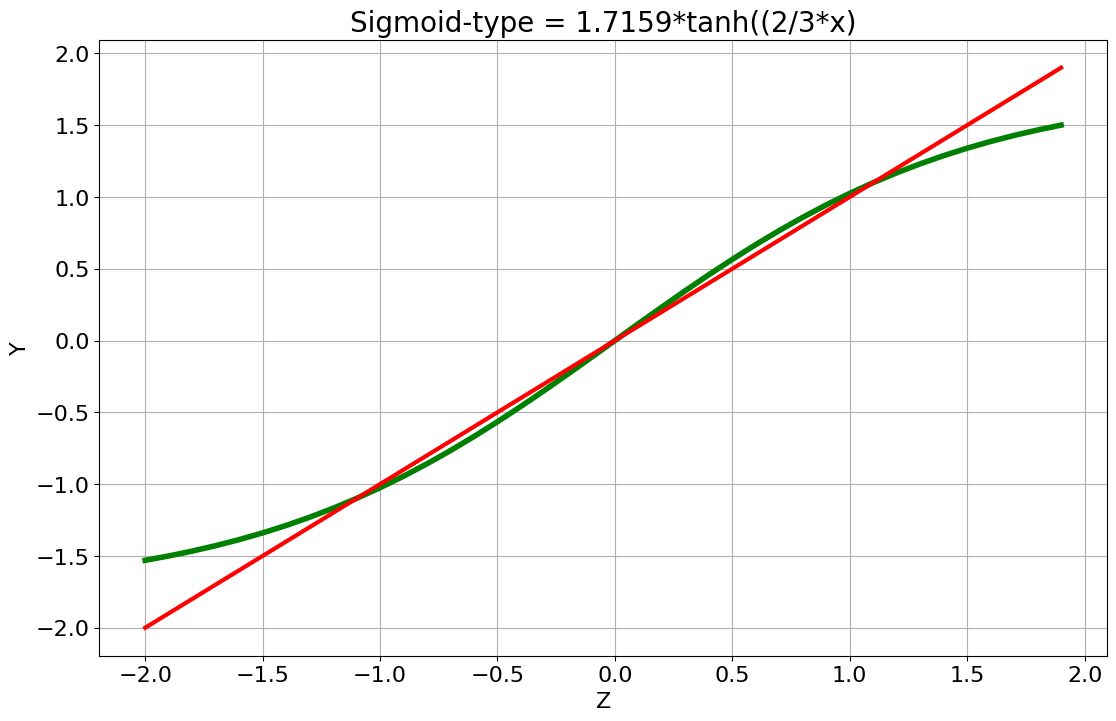

In [24]:
def tanh(z):
    return (np.exp(2*z)- 1)/(np.exp(2*z)+1)

# The following array is generated for plotting the hyperbolic tangent function
x1 = np.arange(-2, 2.0, 0.1)
y1 = 1.759*tanh((2/3*x1))

y2 = x1
#Samples and function F are plotted
plt.figure(figsize=(13,8))

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.xlabel('Z', fontsize=16)
plt.grid(True)
plt.title('Sigmoid-type = 1.7159*tanh((2/3*x)', size=20)

#Plotting function
plt.plot(x1, y1, color='green', lw=4)
plt.plot(x1, y2, color='red', lw=3)

plt.show()

In [25]:
np.random.seed(1)

input_nodes = n_x     # The input layer has n_x nodes
output_nodes = n_y    # The output layer has n_y nodes

model = Sequential()

model.add(Dense(output_nodes,  kernel_initializer='uniform', bias_initializer='zeros', \
                input_dim=input_nodes, activation='tanh'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


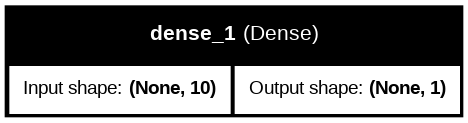

In [26]:
plot_model(model, to_file='model.png', show_shapes=True, rankdir='TB',
      expand_nested=True, show_layer_names=True, dpi=96)

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
sgd = optimizers.SGD(learning_rate=0.01)

model.compile(loss='mean_squared_error', optimizer=sgd)

In [29]:
# 10 % of the learning data will be used to validate the training
validation_fraction = 0.1
epochs = 600

history = model.fit(learn_x, learn_y, epochs=epochs, validation_split = validation_fraction, verbose=2)

# the "history" object contains information generated during learning

Epoch 1/600
12/12 - 1s - 55ms/step - loss: 0.8674 - val_loss: 0.6674
Epoch 2/600
12/12 - 0s - 26ms/step - loss: 0.6525 - val_loss: 0.5956
Epoch 3/600
12/12 - 0s - 35ms/step - loss: 0.6030 - val_loss: 0.5707
Epoch 4/600
12/12 - 0s - 18ms/step - loss: 0.5825 - val_loss: 0.5557
Epoch 5/600
12/12 - 0s - 21ms/step - loss: 0.5691 - val_loss: 0.5440
Epoch 6/600
12/12 - 0s - 34ms/step - loss: 0.5613 - val_loss: 0.5379
Epoch 7/600
12/12 - 0s - 12ms/step - loss: 0.5541 - val_loss: 0.5352
Epoch 8/600
12/12 - 0s - 36ms/step - loss: 0.5494 - val_loss: 0.5298
Epoch 9/600
12/12 - 0s - 17ms/step - loss: 0.5442 - val_loss: 0.5260
Epoch 10/600
12/12 - 0s - 25ms/step - loss: 0.5409 - val_loss: 0.5251
Epoch 11/600
12/12 - 0s - 18ms/step - loss: 0.5388 - val_loss: 0.5231
Epoch 12/600
12/12 - 1s - 45ms/step - loss: 0.5370 - val_loss: 0.5211
Epoch 13/600
12/12 - 1s - 49ms/step - loss: 0.5348 - val_loss: 0.5182
Epoch 14/600
12/12 - 1s - 49ms/step - loss: 0.5339 - val_loss: 0.5167
Epoch 15/600
12/12 - 1s - 46m

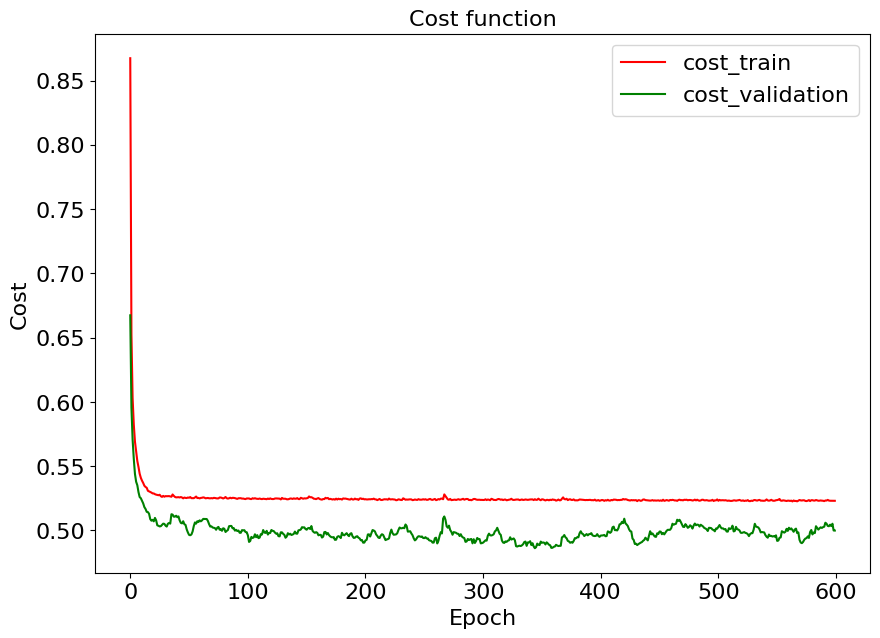

In [30]:
plt.figure(figsize=(10, 7))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Cost function', size=16)
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['cost_train', 'cost_validation'],loc='upper right', prop={'size': 16})
plt.show()

It has 3 layers,
with the following number of nodes per layer [10, 2, 1]


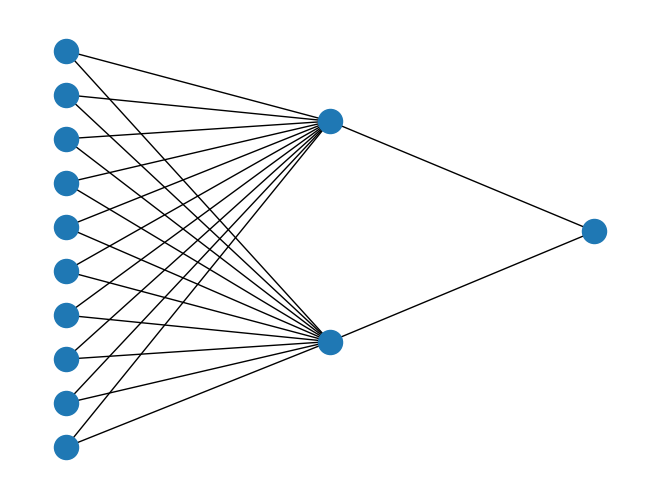

In [31]:
n_x = learn_x.shape[1]
n_h = 2
n_y = learn_y.shape[1]

layers = [n_x, n_h, n_y]
net = Network(layers)
net.graph(layers)

In [32]:
np.random.seed(1)

input_nodes = n_x     # The input layer has n_x nodes
hlayer1_nodes = n_h   # The first hidden layer has n_h nodes
output_nodes = n_y    # The output layer has n_y nodes

model = Sequential()

model.add(Dense(hlayer1_nodes,  kernel_initializer='uniform', bias_initializer='zeros', \
                input_dim=input_nodes, activation='tanh'))

model.add(Dense(output_nodes, kernel_initializer='uniform', bias_initializer='zeros', activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


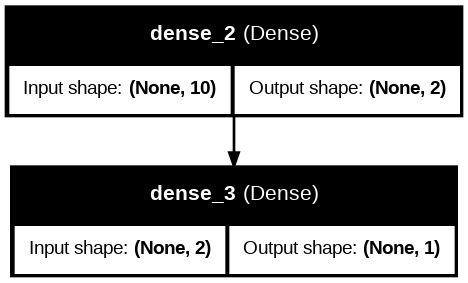

In [33]:
plot_model(model, to_file='model.png', show_shapes=True, rankdir='TB',
      expand_nested=True, show_layer_names=True, dpi=96)

In [34]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │            22 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
sgd = optimizers.SGD(learning_rate=0.01)

model.compile(loss='mean_squared_error', optimizer=sgd)

In [36]:
validation_ratio = 0.1
epochs = 600

history = model.fit(learn_x, learn_y, epochs=epochs, validation_split = validation_ratio, verbose=0)

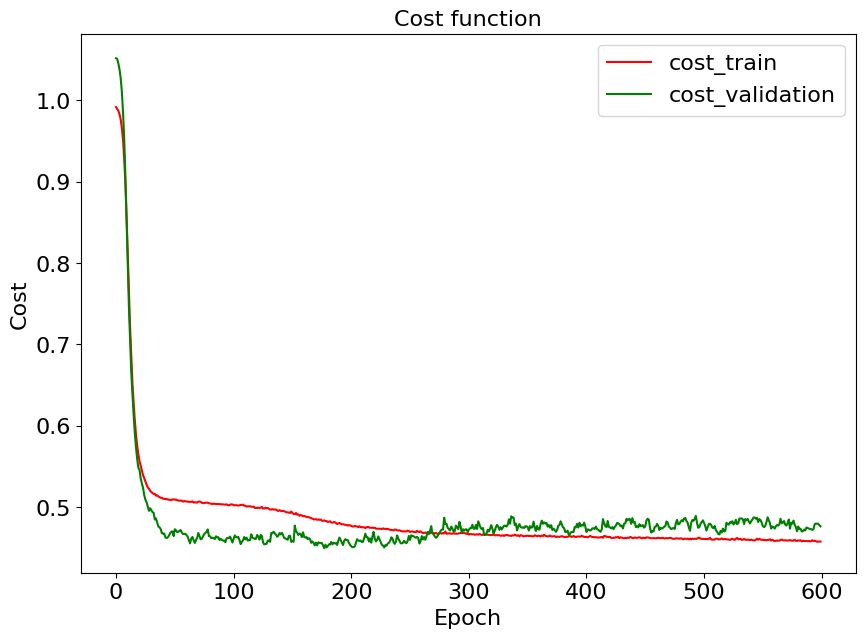

In [37]:
plt.figure(figsize=(10, 7))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Cost function', size=16)
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['cost_train', 'cost_validation'],loc='upper right', prop={'size': 16})
plt.show()

It has 3 layers,
with the following number of nodes per layer [10, 2, 1]


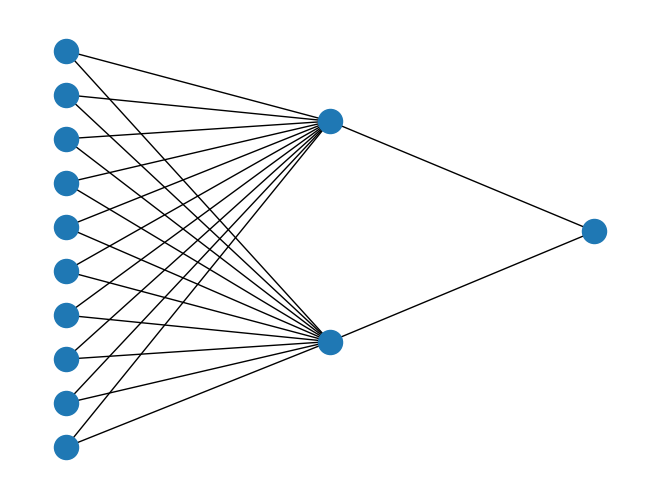

In [38]:
n_x = learn_x.shape[1]
n_h = 2
n_y = learn_y.shape[1]

layers = [n_x, n_h, n_y]
net = Network(layers)
net.graph(layers)

In [39]:
np.random.seed(1)

input_nodes = n_x     # The input layer has n_x nodes
hlayer1_nodes = n_h   # The first hidden layer has n_h nodes
output_nodes = n_y    # The output layer has n_y nodes

model = Sequential()

model.add(Dense(hlayer1_nodes,  kernel_initializer='uniform', bias_initializer='zeros', \
                input_dim=input_nodes, activation='tanh'))

model.add(Dense(output_nodes, kernel_initializer='uniform', bias_initializer='zeros', activation='tanh'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


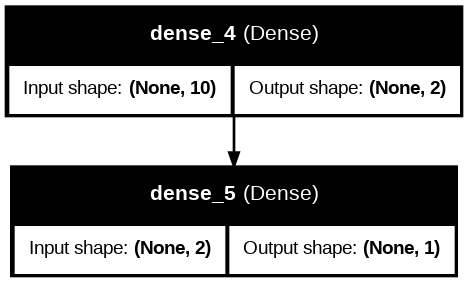

In [40]:
plot_model(model, to_file='model.png', show_shapes=True, rankdir='TB',
      expand_nested=True, show_layer_names=True, dpi=96)

In [41]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2)              │            22 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
sgd = optimizers.SGD(learning_rate=0.01)

model.compile(loss='mean_squared_error', optimizer=sgd)

In [43]:
validation_ratio = 0.1
epochs = 600

history = model.fit(learn_x, learn_y, epochs=epochs, validation_split = validation_ratio, verbose=0)

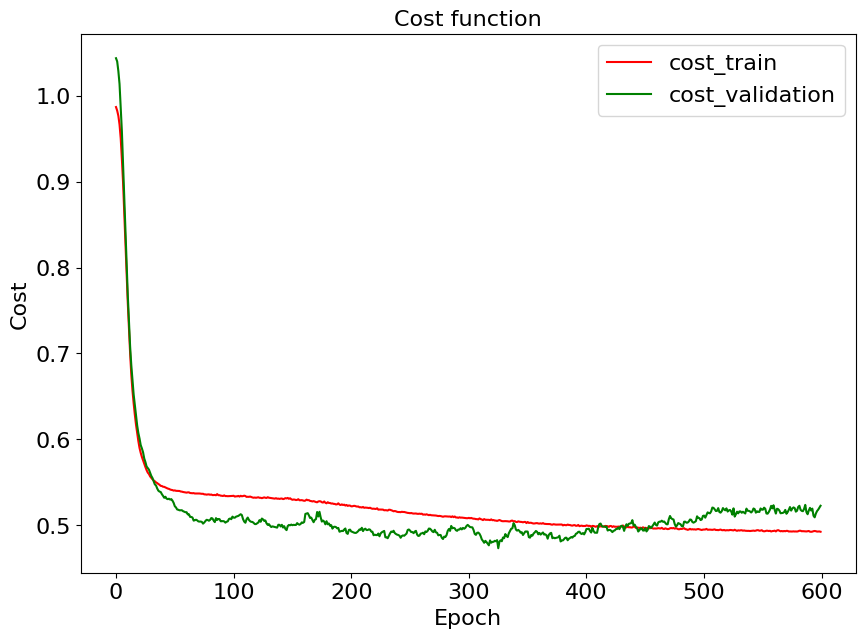

In [44]:
plt.figure(figsize=(10, 7))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Cost function', size=16)
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['cost_train', 'cost_validation'],loc='upper right', prop={'size': 16})
plt.show()

It has 3 layers,
with the following number of nodes per layer [10, 3, 1]


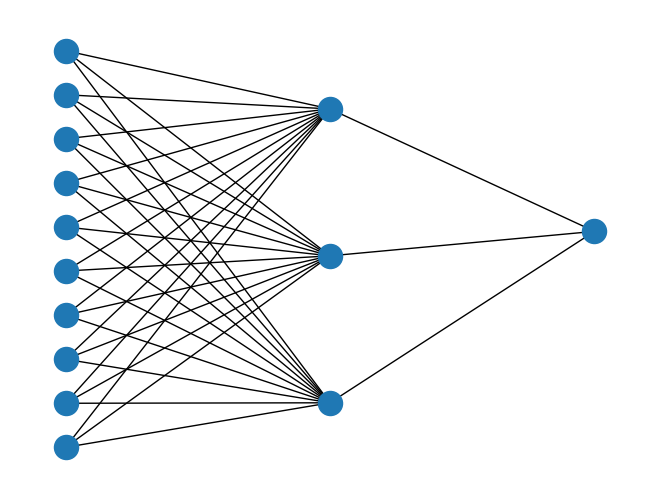

In [45]:
n_x = learn_x.shape[1]
n_h = 3
n_y = learn_y.shape[1]

layers = [n_x, n_h, n_y]
net = Network(layers)
net.graph(layers)

In [46]:
np.random.seed(1)

model = Sequential()

input_nodes = n_x     #input layer has n_x nodes
hlayer1_nodes = n_h   #first hidden layer has n_h nodes
output_nodes = n_y    #output layer has n_y nodes

model.add(Dense(hlayer1_nodes,  kernel_initializer='uniform', bias_initializer='zeros', \
                input_dim=input_nodes, activation='tanh'))

model.add(Dense(output_nodes, kernel_initializer='uniform', bias_initializer='zeros', activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


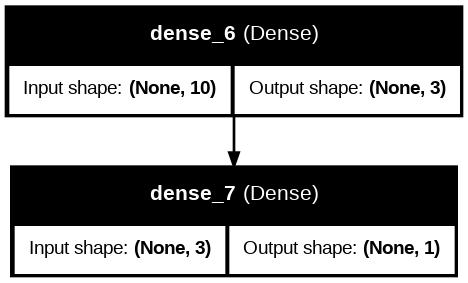

In [47]:
plot_model(model, to_file='model.png', show_shapes=True, rankdir='TB',
      expand_nested=True, show_layer_names=True, dpi=96)

In [48]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 3)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
sgd = optimizers.SGD(learning_rate=0.01)

model.compile(loss='mean_squared_error', optimizer=sgd)

In [ ]:
validation_ratio = 0.1
epochs = 600

history = model.fit(learn_x, learn_y, epochs=epochs, validation_split = validation_ratio, verbose=0)

In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Cost function', size=16)
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['cost_train', 'cost_validation'],loc='upper right', prop={'size': 16})
plt.show()

# Red neuronal usando 2 capas ocualtas

In [ ]:
n_x = learn_x.shape[1]
n_h1 = 5
n_h2  = 4
n_y = learn_y.shape[1]

layers = [n_x, n_h1, n_h2, n_y]
net = Network(layers)
net.graph(layers)


In [ ]:
np.random.seed(1)

input_nodes = n_x     # The input layer has n_x nodes
hlayer1_nodes = n_h1  # The first hidden layer has n_h1 nodes
hlayer2_nodes = n_h2  # The second hidden layes has n_h2 nodes
output_nodes = n_y    # The output layer has n_y nodes


model = Sequential()

model.add(Dense(hlayer1_nodes,  kernel_initializer='uniform', bias_initializer='zeros', \
                input_dim=input_nodes, activation='tanh'))

model.add(Dense(hlayer2_nodes,  kernel_initializer='uniform', bias_initializer='zeros', \
                input_dim=input_nodes, activation='tanh'))


model.add(Dense(output_nodes, kernel_initializer='uniform', bias_initializer='zeros', activation='linear'))

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, rankdir='TB',
      expand_nested=True, show_layer_names=True, dpi=96)

In [ ]:
model.summary()

In [ ]:
sgd = optimizers.SGD(learning_rate=0.01)

model.compile(loss='mean_squared_error', optimizer=sgd)

In [ ]:
validation_ratio = 0.1
epochs = 600

history = model.fit(learn_x, learn_y, epochs=epochs, validation_split = validation_ratio,verbose=0)

In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Cost function', size=16)
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['cost_train', 'cost_validation'],loc='upper right', prop={'size': 16})
plt.show()